In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract


In [49]:
def display_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [50]:
plate_cascade = cv2.CascadeClassifier(r'C:\Users\worka\OneDrive\Desktop\haarcascade_russian_plate_number.xml')


In [51]:
def detect_plate(img):


    plate_img = img.copy()
    plate_copy = plate.copy()

    plate_rects = plate_cascade.detectMultiScale(plate_img)

    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_copy, (x,y), (x+w,y+h), (255,255,255), 15)


    return plate_copy

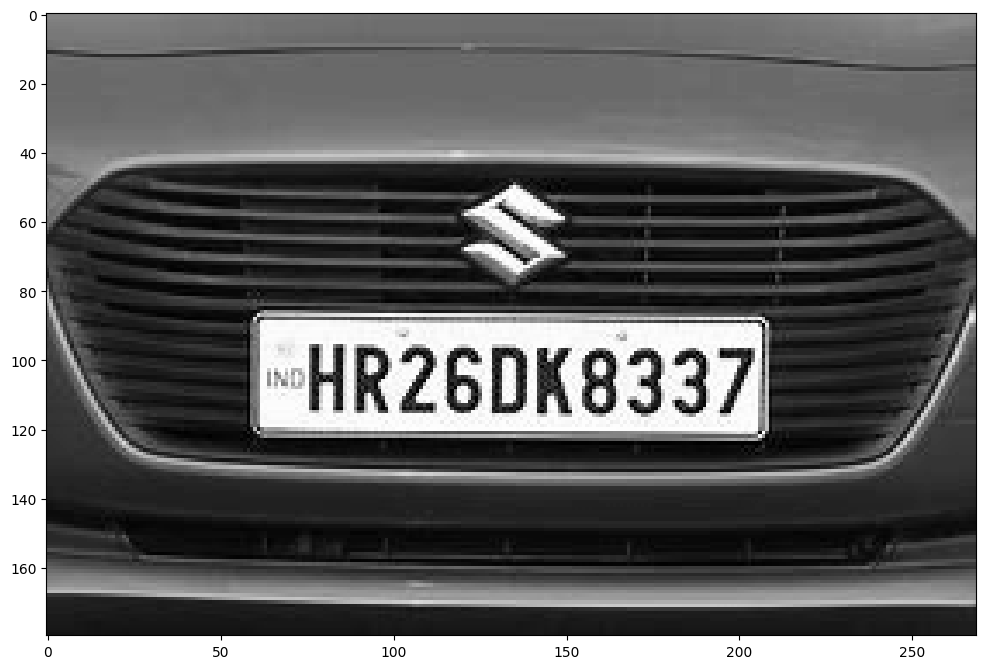

In [52]:
plate = cv2.imread('assets/numberPlate6.jpg')
plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
display_img(plate)

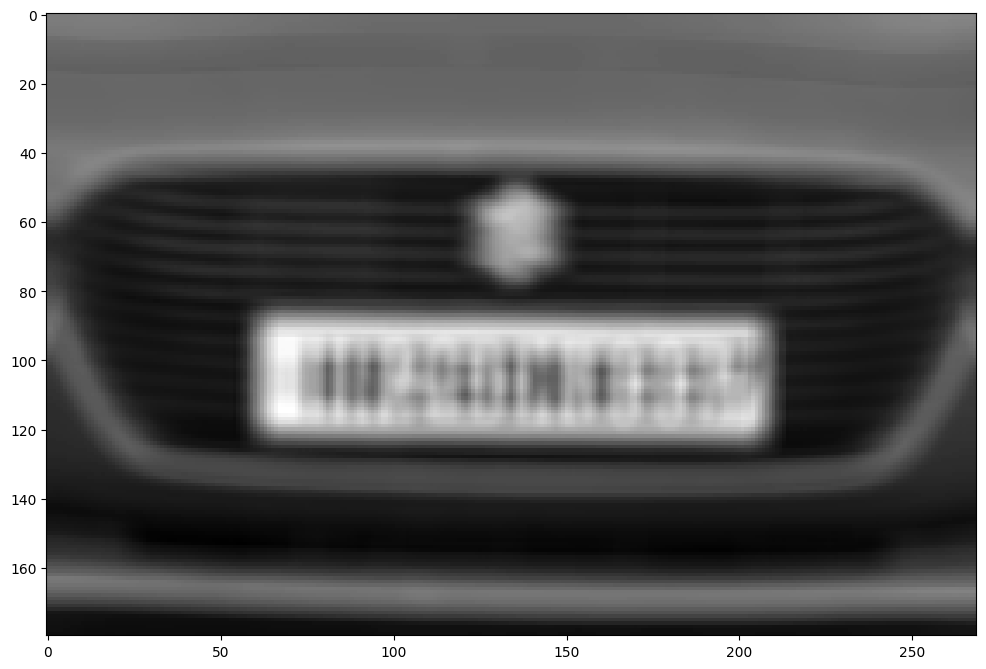

In [53]:
blurred = cv2.blur(plate, (10,10))
display_img(blurred)

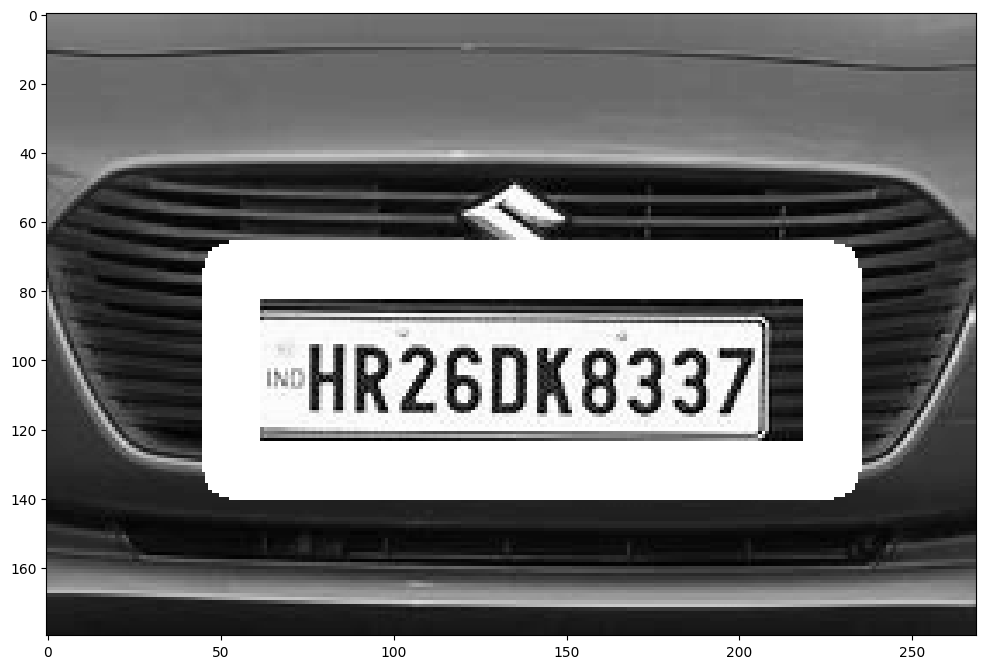

In [54]:
result = detect_plate(blurred)
display_img(result)

In [55]:
# SAMPLE PROGRAM TO FIND THE REIGON OF INTEREST
def find_roi(img):


    plate_img = img.copy()
    plate_copy2 = plate.copy()

    plate_rects = plate_cascade.detectMultiScale(plate_img)

    for (x,y,w,h) in plate_rects:
        roi = plate_copy2[y:y+h, x:x+w]
        #cv2.rectangle(plate_img, (x,y), (x+w,y+h), (255,255,255), 15)


    return roi

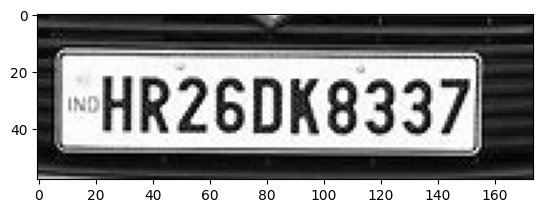

In [56]:
region = find_roi(blurred)
plt.imshow(region, cmap='gray')

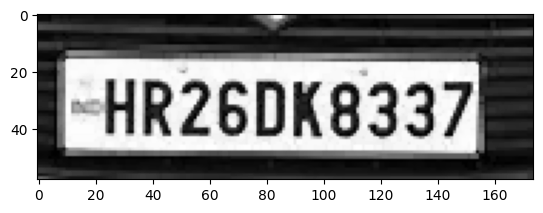

In [57]:
kernel1 = np.ones((2, 2), np.uint8)
open = cv2.morphologyEx(region, cv2.MORPH_OPEN, kernel1)
erode = cv2.morphologyEx(open, cv2.MORPH_ERODE, kernel1)
kernel2 = np.ones((1, 1), np.uint8)
dilate = cv2.morphologyEx(open, cv2.MORPH_DILATE, kernel2)
blurredroi = cv2.blur(dilate, (1,1))
plt.imshow(blurredroi, cmap='gray')

In [58]:
def ocr_with_preprocessing(image):
    # Use adaptive thresholding to convert the grayscale image to binary
    _, binary = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

    # Pass the processed image to Tesseract
    text = pytesseract.image_to_string(binary)

    return text

In [59]:
def removeSpecialCharacter(s):
    result = ''
    for char in s:
        # Checking if the character is an alphabet letter, a digit, or a space
        if char.isalpha() or char.isdigit() or char.isspace():
            result += char

    return result

In [60]:
extracted_text = ocr_with_preprocessing(blurredroi)
extracted_text = removeSpecialCharacter(extracted_text)

In [61]:
print(extracted_text)

HR26DK8337

